In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [6]:
cs_set = [16, 32, 64, 84, 108, 128]
num_set = np.asarray("40000 80000 120000 160000 200000 300000 400000 500000 620000".split(" "), dtype=int)
filename_template = 'perf_locs_{}_cs_{}'
file_folder = './log/a100'

perf_glops = np.zeros([len(num_set), len(cs_set)])
perf_time = np.zeros([len(num_set), len(cs_set)])

for i, locs_num in enumerate(num_set):
    for j, cs in enumerate(cs_set):
        filename = filename_template.format(locs_num, cs)
        file_path = os.path.join(file_folder, filename)
        # Open the file
        with open(file_path, 'r') as file:
            # Read all lines into a list
            lines = file.readlines()

            # Access the third and sixth lines
            time_total = lines[2].strip().split(" ")[0]
            gflop_ops = lines[5].strip().split(" ")[0]
            
            perf_glops[i, j] = gflop_ops
            perf_time[i, j] = time_total

/tmp/ipykernel_49731/2002962711.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels)


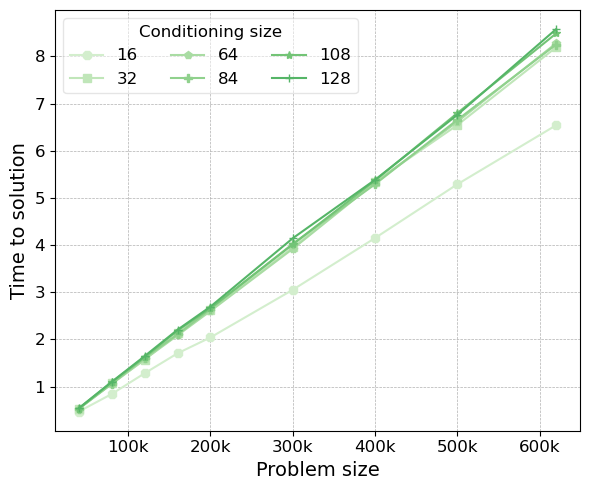

In [7]:
# Create a plot with a larger size and a better style
plt.figure(figsize=(6, 5))

colors = cm.Greens(np.linspace(0.2, 0.8, len(num_set)))
markers = ["8", "s", "p", "P", "*", "+", "D", "v", "^"]
# Plot both arrays with different colors and line styles
for i, num_cs in enumerate(cs_set):
    plt.plot(np.asarray(num_set)/1000, perf_time[:, i], color=colors[i], linewidth=1.5, marker=markers[i], label=str(num_cs))

# tick modification
x_ticks = plt.gca().get_xticks()
new_labels = [f'{int(tick)}k' for tick in x_ticks]
plt.gca().set_xticklabels(new_labels)
plt.tick_params(axis='both', which='major', labelsize=12)

# Adding enhanced legend, title, and labels
legend = plt.legend(ncol = len(cs_set)//2, fontsize=12,
                    title = 'Conditioning size') #loc='lower center', bbox_to_anchor=(0.5, -0.3) 
legend.get_frame().set_alpha(0.5)  # 50% transparency
plt.setp(legend.get_title(), fontsize='large')  # You can use a numeric value or strings like 'large'
plt.xlabel(r'Problem size', fontsize=14)
plt.ylabel('Time to solution', fontsize=14)
# plt.ylim(0.2, 4.0)

# Adding grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.yscale('log')
# plt.ylim(1.5, 3.9)

plt.tight_layout()
plt.savefig(f'./fig/perf_time_a100.pdf')
plt.show()

/tmp/ipykernel_49731/2544228240.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels)


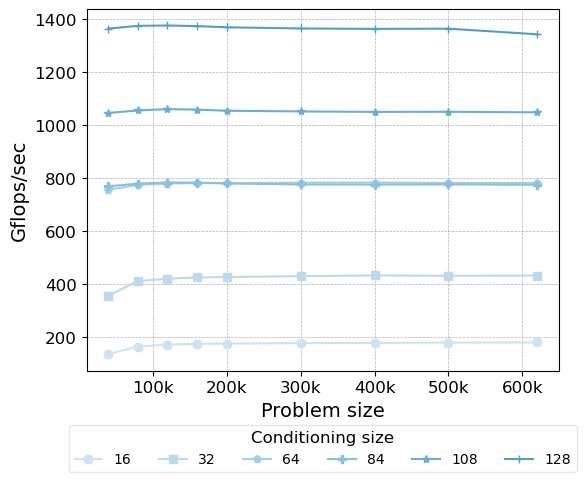

In [8]:
# Create a plot with a larger size and a better style
plt.figure(figsize=(6, 5))


colors = cm.Blues(np.linspace(0.2, 0.8, len(num_set)))
markers = ["8", "s", "p", "P", "*", "+", "D", "v", "^"]
# Plot both arrays with different colors and line styles
for i, num_cs in enumerate(cs_set):
    plt.plot(np.asarray(num_set)/1000, perf_glops[:, i], color=colors[i], linewidth=1.5, marker=markers[i], label=str(num_cs))

# tick modification
x_ticks = plt.gca().get_xticks()
new_labels = [f'{int(tick)}k' for tick in x_ticks]
plt.gca().set_xticklabels(new_labels)
plt.tick_params(axis='both', which='major', labelsize=12)
                
# Adding enhanced legend, title, and labels
legend = plt.legend(ncol = len(num_set), title = 'Conditioning size',
                    loc='lower center', bbox_to_anchor=(0.5, -0.3)) 
legend.get_frame().set_alpha(0.5)  # 50% transparency
plt.setp(legend.get_title(), fontsize='large')
plt.xlabel(r'Problem size', fontsize=14)
plt.ylabel('Gflops/sec', fontsize=14)

# Adding grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.yscale('log')
# plt.ylim(1.5, 3.9)

plt.tight_layout()
plt.savefig(f'./fig/perf_gflops_a100.pdf')
plt.show()